# Homework 3

Please submit the solution to gradescope by 11:59 PM, Oct 10, Thursday.

**Name**: Ivy Nangalia 

**PID**: 730670491


In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

# 1. DataFrame with MultiIndex (12 points)

You are given the following MultiIndexed DataFrame temperature_data which contains monthly average temperatures (in °C) for different cities over two years. 

- 1.1. Display the temperature data for the year 2019.
- 1.2. Display the temperature data for 'New York' city across all years.
- 1.3. Display the temperature data for the month of 'Jan' across all cities and years.
- 1.4. Display temperature data for 'Los Angeles' city for the year 2020.
- 1.5. Display the temperature data for the 'Chicago' and 'Houston' cities for the month of 'Feb' in the year 2019.
- 1.6. Display the temperature data for the months 'Mar' and 'Apr' for all cities in the year 2020.

In [272]:
index = pd.MultiIndex.from_product(
    [['2019', '2020'], ['New York', 'Los Angeles', 'Chicago', 'Houston'], ['Jan', 'Feb', 'Mar', 'Apr']],
    names=['Year', 'City', 'Month']
)

np.random.seed(42)
data = np.random.uniform(-10, 35, size=(32, 1))

temperature_data = pd.DataFrame(data, index=index, columns=['Avg_Temperature'])
temperature_data.sort_index(inplace=True)
temperature_data

Avg_Temperature
Year City        Month                 
2019 Chicago     Apr          33.645943
                 Feb          21.863266
                 Jan          17.050176
                 Mar          -9.073698
     Houston     Apr          -1.746797
                 Feb          -0.444740
                 Jan          27.459919
                 Mar          -1.817876
     Los Angeles Apr          28.977927
                 Feb          -2.980247
                 Jan          -2.979161
                 Mar          -7.386237
     New York    Apr          16.939632
                 Feb          32.782144
                 Jan           6.854305
                 Mar          22.939727
2020 Chicago     Apr          13.140550
                 Feb          25.332918
                 Jan          10.523149
                 Mar          -1.014680
     Houston     Apr          -2.326414
                 Feb          -7.909731
                 Jan          16.658656
                 Mar          17.339518
     Los Angeles Apr           6.486283
                 Feb          -3.722776
                 Jan          17.533380
                 Mar           3.146509
     New York    Apr           3.105311
                 Feb          13.614039
                 Jan           3.690901
                 Mar           9.437526

In [273]:
#1.1
temperature_data.loc[:"2019"]

Avg_Temperature
Year City        Month                 
2019 Chicago     Apr          33.645943
                 Feb          21.863266
                 Jan          17.050176
                 Mar          -9.073698
     Houston     Apr          -1.746797
                 Feb          -0.444740
                 Jan          27.459919
                 Mar          -1.817876
     Los Angeles Apr          28.977927
                 Feb          -2.980247
                 Jan          -2.979161
                 Mar          -7.386237
     New York    Apr          16.939632
                 Feb          32.782144
                 Jan           6.854305
                 Mar          22.939727

In [274]:
#1.2
temperature_data.loc[:, 'New York', :]


Avg_Temperature
Year Month                 
2019 Apr          16.939632
     Feb          32.782144
     Jan           6.854305
     Mar          22.939727
2020 Apr           3.105311
     Feb          13.614039
     Jan           3.690901
     Mar           9.437526

In [275]:
#1.3
temperature_data.loc[:, :, "Jan"]

Avg_Temperature
Year City                        
2019 Chicago            17.050176
     Houston            27.459919
     Los Angeles        -2.979161
     New York            6.854305
2020 Chicago            10.523149
     Houston            16.658656
     Los Angeles        17.533380
     New York            3.690901

In [276]:
#1.4
temperature_data.loc["2020", "Los Angeles", :]

,Avg_Temperature
Month,
Apr,6.486283
Feb,-3.722776
Jan,17.533380
Mar,3.146509


In [277]:
#1.5
temperature_data.loc[("2019", ["Chicago", "Houston"], "Feb")]

Avg_Temperature
Year City    Month                 
2019 Chicago Feb          21.863266
     Houston Feb          -0.444740

In [278]:
#1.6
temperature_data.loc["2020", :, ["Mar", "Apr"]]


Avg_Temperature
Year City        Month                 
2020 Chicago     Mar          -1.014680
     Houston     Mar          17.339518
     Los Angeles Mar           3.146509
     New York    Mar           9.437526
     Chicago     Apr          13.140550
     Houston     Apr          -2.326414
     Los Angeles Apr           6.486283
     New York    Apr           3.105311

# 2. Data Merge and Join (68 points)

2.1 Load `product_data.csv` and `sales_data.csv` as DataFrames. (2 points) (In the columns, both `ProductID` and `ID_Product` refers to the product ID.)

2.2 Calculate Total Quantity Sold per Product, i.e., create a pd.Series called `product_sales_df` that contains the sales data for each product and display it. The index of the pd.Series is the product name. (10 points)

2.3 Perform a join to merge `product_sales_df` with the product data on ProductID to include all products. Why does the merged table have missing data? (10 points)

2.4 Fill the missing data in the table from 2.3 with 0. Calculate total and average quantities sold for each category, i.e., create a new DataFrame that contains three columns: `Category`, `TotalQuantitySold`, and `AverageQuantitySold`. (5 points)

2.5  Calculate the total revenue per product and identifying the product that generated the highest revenue. The revenue equals the `sales` $\times$ `unit price`. (10 points)


2.6 Identify Top Products per Category Based on Total Quantity Sold, i.e., create a table with three columns. The first column is the `category` name, the second column is the name of the product with the highest sales in that category, and the third column is the sales for that product. (10 points)

2.7 Create a table with two layers of row index, showing the total revenue for each category in each month. The first row index is the category and the second row index is the month. (5 points)

2.8 Creat a histogram to show the total quantity sold per category. Properly display the x-axis, y-axis and the title of the plot. (6 points)

2.9 Create a pivot table of the total quantity and the average quantity sold by product and month. The row index should be the product name, and the column index has two layers: The upper layer is the month, and the lower layer is the `TotalQuantity` and `AverageQuantity`. For example, the first column index in the upper layer is `2023-01`. Under `2023-01`, there are two columns named `AverageQuantity` (mean) and `TotalQuantity` (sum). (10 points)

Hint: You can use [swaplevel](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html) function in pd.DataFrame to change the index layer. For example: `pivot_table = pivot_table.swaplevel(0, 1, axis=1)` can swap the index layer for the pivot table

In [279]:
# 2.1
product_data = pd.read_csv("product_data.csv")
sales_data = pd.read_csv("sales_data.csv")
product_data

,ID_Product,ProductName,Category,UnitPrice
0,P101,Samsung Galaxy S21,Smartphones,799.99
1,P102,Apple iPhone 13,Smartphones,999.99
2,P103,HP Spectre x360,Laptops,1199.99
3,P104,Dell XPS 13,Laptops,1099.99
4,P105,Apple MacBook Air,Laptops,999.99
5,P106,LG OLED55CXPUA,Televisions,1499.99
6,P107,Sony WH-1000XM4,Headphones,349.99
7,P108,Bose QuietComfort 35 II,Headphones,299.99
8,P109,Canon EOS R5,Cameras,3899.99
9,P110,Nikon Z7 II,Cameras,2999.99


In [280]:
#2.2
product_sales_df = sales_data.groupby("ProductID")["Quantity"].sum()
product_sales_df


ProductID
P101    3
P102    2
P103    3
P104    2
P105    5
P106    2
P107    4
P108    5
P109    1
P111    3
P112    2
P113    3
P114    2
P115    2
P116    3
P117    3
P118    2
P119    5
P120    2
Name: Quantity, dtype: int64

In [281]:
#2.3
product_sales = pd.merge(product_sales_df, product_data, 
         left_on="ProductID", right_on="ID_Product", how="outer")
product_sales

,Quantity,ID_Product,ProductName,Category,UnitPrice
0,3.0,P101,Samsung Galaxy S21,Smartphones,799.99
1,2.0,P102,Apple iPhone 13,Smartphones,999.99
2,3.0,P103,HP Spectre x360,Laptops,1199.99
3,2.0,P104,Dell XPS 13,Laptops,1099.99
4,5.0,P105,Apple MacBook Air,Laptops,999.99
5,2.0,P106,LG OLED55CXPUA,Televisions,1499.99
6,4.0,P107,Sony WH-1000XM4,Headphones,349.99
7,5.0,P108,Bose QuietComfort 35 II,Headphones,299.99
8,1.0,P109,Canon EOS R5,Cameras,3899.99
9,3.0,P111,Apple iPad Pro,Tablets,799.99


The merged table would have missing data in the Quantity column if certain products were not marked as sold.

In [282]:
#2.4
product_sales = product_sales.fillna(0)
summaries = pd.DataFrame()
summaries["AverageQuantitySold"] = product_sales.groupby("Category")["Quantity"].mean()
summaries["TotalQuantitySold"] = product_sales.groupby("Category")["Quantity"].sum()
summaries

,AverageQuantitySold,TotalQuantitySold
Category,,
Cameras,0.500000,1.0
Gaming Consoles,2.000000,4.0
Headphones,4.500000,9.0
Home Appliances,3.000000,9.0
Laptops,3.333333,10.0
Office Supply,0.000000,0.0
Smartphones,2.500000,5.0
Smartwatches,3.000000,6.0
Tablets,2.666667,8.0


In [283]:
#2.5
product_sales["Revenue"] = product_sales["Quantity"] * product_sales["UnitPrice"]
product_sales

,Quantity,ID_Product,ProductName,Category,UnitPrice,Revenue
0,3.0,P101,Samsung Galaxy S21,Smartphones,799.99,2399.97
1,2.0,P102,Apple iPhone 13,Smartphones,999.99,1999.98
2,3.0,P103,HP Spectre x360,Laptops,1199.99,3599.97
3,2.0,P104,Dell XPS 13,Laptops,1099.99,2199.98
4,5.0,P105,Apple MacBook Air,Laptops,999.99,4999.95
5,2.0,P106,LG OLED55CXPUA,Televisions,1499.99,2999.98
6,4.0,P107,Sony WH-1000XM4,Headphones,349.99,1399.96
7,5.0,P108,Bose QuietComfort 35 II,Headphones,299.99,1499.95
8,1.0,P109,Canon EOS R5,Cameras,3899.99,3899.99
9,3.0,P111,Apple iPad Pro,Tablets,799.99,2399.97


In [284]:
#2.6
product_sales = product_sales.set_index('ProductName')

category_quantity = pd.DataFrame({
    "Sales" :  product_sales.groupby("Category")["Revenue"].max(),
    "Product_Name" : product_sales.groupby("Category")["Revenue"].idxmax()
    })
    
category_quantity

,Sales,Product_Name
Category,,
Cameras,3899.99,Canon EOS R5
Gaming Consoles,999.98,Sony PlayStation 5
Headphones,1499.95,Bose QuietComfort 35 II
Home Appliances,1599.98,Roomba i7+ Robot Vacuum
Laptops,4999.95,Apple MacBook Air
Office Supply,0.00,Xerox Printer
Smartphones,2399.97,Samsung Galaxy S21
Smartwatches,1199.97,Apple Watch Series 6
Tablets,2399.97,Apple iPad Pro


In [285]:
#2.7
sales_product_data = pd.merge(
    sales_data, product_data, 
    left_on="ProductID", right_on="ID_Product"
    )

sales_product_data["Revenue"] = sales_product_data["Quantity"] * sales_product_data["UnitPrice"]

sales_product_data.groupby(by=["Month", "Category"])["Revenue"].sum()

Month    Category       
2023-01  Cameras            3899.99
         Gaming Consoles     999.98
         Headphones         2299.93
         Home Appliances    1449.95
         Laptops            8599.92
         Smartphones        4399.95
         Smartwatches       1259.96
         Tablets            3649.95
         Televisions        2999.98
2023-02  Gaming Consoles     999.98
         Headphones          599.98
         Home Appliances    1359.96
         Laptops            2199.98
         Smartwatches        629.98
         Tablets            2199.97
Name: Revenue, dtype: float64

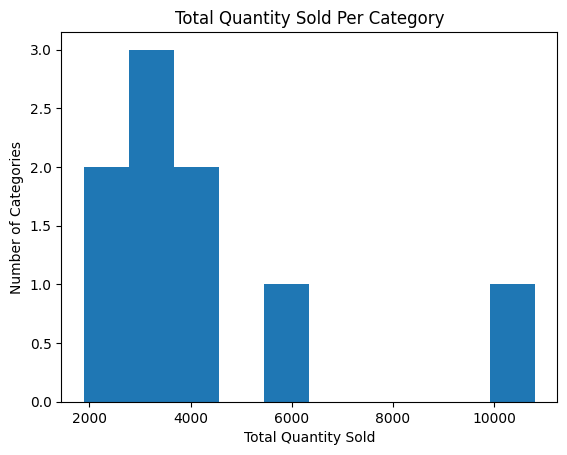

In [286]:
#2.8
plt.hist(
    sales_product_data.groupby("Category")["Revenue"].sum()
    )
plt.xlabel("Total Quantity Sold")
plt.ylabel("Number of Categories")
plt.title("Total Quantity Sold Per Category");

In [287]:
#2.9
pivot_table = sales_product_data.pivot_table(
    index='ProductName', columns=['Month'], 
    values='Quantity', aggfunc=['sum', 'mean'])
pivot_table.columns = pd.MultiIndex.from_product(
    [pivot_table.columns.levels[1], 
     ['TotalQuantity', 'AverageQuantity']])
pivot_table


Month                         2023-01                       2023-02  \
                        TotalQuantity AverageQuantity TotalQuantity   
ProductName                                                           
Apple MacBook Air                 4.0             1.0           2.0   
Apple Watch Series 6              2.0             1.0           2.0   
Apple iPad Pro                    2.0             1.0           2.0   
Apple iPhone 13                   2.0             NaN           1.0   
Bose QuietComfort 35 II           3.0             2.0           1.5   
Canon EOS R5                      1.0             NaN           1.0   
Dell XPS 13                       2.0             NaN           1.0   
Fitbit Versa 3                    2.0             1.0           2.0   
HP Spectre x360                   2.0             1.0           1.0   
Instant Pot Duo 7-in-1            3.0             2.0           3.0   
KitchenAid Stand Mixer            1.0             1.0           1.0   
LG OLED55CXPUA                    2.0             NaN           1.0   
Microsoft Surface Pro 7           1.0             1.0           1.0   
Microsoft Xbox Series X           1.0             1.0           1.0   
Roomba i7+ Robot Vacuum           1.0             1.0           1.0   
Samsung Galaxy S21                3.0             NaN           1.5   
Samsung Galaxy Tab S7             2.0             1.0           2.0   
Sony PlayStation 5                1.0             1.0           1.0   
Sony WH-1000XM4                   4.0             NaN           2.0   

Month                                    
                        AverageQuantity  
ProductName                              
Apple MacBook Air                   1.0  
Apple Watch Series 6                1.0  
Apple iPad Pro                      1.0  
Apple iPhone 13                     NaN  
Bose QuietComfort 35 II             2.0  
Canon EOS R5                        NaN  
Dell XPS 13                         NaN  
Fitbit Versa 3                      1.0  
HP Spectre x360                     1.0  
Instant Pot Duo 7-in-1              2.0  
KitchenAid Stand Mixer              1.0  
LG OLED55CXPUA                      NaN  
Microsoft Surface Pro 7             1.0  
Microsoft Xbox Series X             1.0  
Roomba i7+ Robot Vacuum             1.0  
Samsung Galaxy S21                  NaN  
Samsung Galaxy Tab S7               1.0  
Sony PlayStation 5                  1.0  
Sony WH-1000XM4                     NaN

# 3. Webscrapping: Collect the Emails of all faculty in the STOR department  (20 points)

Use web scrapping technique to collect the email information of all faculty in the UNC STOR department from the webpage: [https://stor.unc.edu/people/faculty/](https://stor.unc.edu/people/faculty/) 


3.1. Create a pd.DataFrame that contains three columns: `faculty_name`, `title` and `email_address`. (10 points)
For example, one row of the dataframe is `Liu, Mo`, `Assistant Professor`, and `Mo_Liu@unc.edu`.



3.2. Notice that in the DataFrame in 3.1, the last name and first name of each person are stored in the same column and separated by `,`. Create two new columns `First_Name` and `Last_Name` that contains the first name and last name seperately. (10 points)

In [288]:
url = "http://stor.unc.edu/people/faculty"

# Call the GET request
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

In [289]:
#for a in soup.select(".bi-envelope+ a"):
    #print(a.get_text().strip())

scrape = ".js-wpv-view-layout-129 .row:nth-child(9) .faculty-holder , .faculty-holder-strong+ .faculty-holder , .faculty-holder-strong , .faculty-holder~ .faculty-holder+ .faculty-holder"

faculty_name = []
title = []
email_address = []

for a in soup.select(scrape):
    a = a.get_text().strip()
    if ", " in a:
        faculty_name.append(a)
    elif "Professor" in a:
        title.append(a)
    elif "unc.edu" in a:
        email_address.append(a)

print(len(faculty_name) == len(title) == len(email_address))

True


In [299]:
# since the len of all three lists are the same
# and the text scrapes one line at a time
# we can match them up by index
faculty = pd.DataFrame({
    "faculty_name": faculty_name,
    "title": title,
    "email_address": email_address
})
faculty.head(10)

,faculty_name,title,email_address
0,"Abayomi, Oluremi",Teaching Assistant Professor,abayomio@unc.edu
1,"Banerjee, Sayan",Associate Professor,sayan@email.unc.edu
2,"Budhiraja, Amarjit",Professor,amarjit@unc.edu
3,"Fraiman, Nicolas",Associate Professor,fraiman@email.unc.edu
4,"Hannig, Jan",Professor,jan.hannig@unc.edu
5,"Ji, Chuanshu",Associate Professor,cji@email.unc.edu
6,"Kulkarni, Vidyadhar",Professor,vkulkarn@email.unc.edu
7,"Li, Yao",Assistant Professor,yaoli@ad.unc.edu
8,"Liu, Mo",Assistant Professor,Mo_Liu@unc.edu
9,"Marron, J. S. (Steve)",Distinguished Professor,marron@unc.edu


In [298]:
# 3.2 - creating First_Name and Last_Name columns:
faculty = faculty.assign(First_Name='', Last_Name='')

# splitting and adding
for idx in range(0, len(faculty)):
    name = str(faculty["faculty_name"][idx])
    (last, first) = name.split(", ")
    faculty["First_Name"][idx] = first
    faculty["Last_Name"][idx] = last


faculty.head(10)

,faculty_name,title,email_address,First_Name,Last_Name
0,"Abayomi, Oluremi",Teaching Assistant Professor,abayomio@unc.edu,Oluremi,Abayomi
1,"Banerjee, Sayan",Associate Professor,sayan@email.unc.edu,Sayan,Banerjee
2,"Budhiraja, Amarjit",Professor,amarjit@unc.edu,Amarjit,Budhiraja
3,"Fraiman, Nicolas",Associate Professor,fraiman@email.unc.edu,Nicolas,Fraiman
4,"Hannig, Jan",Professor,jan.hannig@unc.edu,Jan,Hannig
5,"Ji, Chuanshu",Associate Professor,cji@email.unc.edu,Chuanshu,Ji
6,"Kulkarni, Vidyadhar",Professor,vkulkarn@email.unc.edu,Vidyadhar,Kulkarni
7,"Li, Yao",Assistant Professor,yaoli@ad.unc.edu,Yao,Li
8,"Liu, Mo",Assistant Professor,Mo_Liu@unc.edu,Mo,Liu
9,"Marron, J. S. (Steve)",Distinguished Professor,marron@unc.edu,J. S. (Steve),Marron
